In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    "C:\\Users\\totoz\\Documents\\CS projects\\python\\PetImages",
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_data = datagen.flow_from_directory(
    "C:\\Users\\totoz\\Documents\\CS projects\\python\\PetImages",
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 20000 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.


In [2]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),    
    
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])


In [3]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)


Epoch 1/10
 72/625 [==>...........................] - ETA: 3:51 - loss: 0.8255 - accuracy: 0.5013

C:\Users\totoz\AppData\Local\lib\site-packages\PIL\TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


625/625 [==============================] - 332s 531ms/step - loss: 0.6563 - accuracy: 0.6157 - val_loss: 0.5437 - val_accuracy: 0.7299
Epoch 2/10
625/625 [==============================] - 316s 506ms/step - loss: 0.4900 - accuracy: 0.7667 - val_loss: 0.4619 - val_accuracy: 0.7859
Epoch 3/10
625/625 [==============================] - 352s 563ms/step - loss: 0.3969 - accuracy: 0.8178 - val_loss: 0.4082 - val_accuracy: 0.8155
Epoch 4/10
625/625 [==============================] - 341s 545ms/step - loss: 0.3162 - accuracy: 0.8641 - val_loss: 0.4674 - val_accuracy: 0.7947
Epoch 5/10
625/625 [==============================] - 339s 542ms/step - loss: 0.2187 - accuracy: 0.9100 - val_loss: 0.4308 - val_accuracy: 0.8229
Epoch 6/10
625/625 [==============================] - 348s 556ms/step - loss: 0.1103 - accuracy: 0.9574 - val_loss: 0.5392 - val_accuracy: 0.8257
Epoch 7/10
625/625 [==============================] - 340s 545ms/step - loss: 0.0462 - accuracy: 0.9844 - val_loss: 0.6844 - val_accura

In [4]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_data,
    epochs=5,
    validation_data=val_data
)

Epoch 1/5
625/625 [==============================] - 385s 612ms/step - loss: 0.2727 - accuracy: 0.8809 - val_loss: 0.4096 - val_accuracy: 0.8263
Epoch 2/5
625/625 [==============================] - 381s 609ms/step - loss: 0.1825 - accuracy: 0.9279 - val_loss: 0.4348 - val_accuracy: 0.8291
Epoch 3/5
625/625 [==============================] - 408s 653ms/step - loss: 0.0954 - accuracy: 0.9647 - val_loss: 0.5200 - val_accuracy: 0.8385
Epoch 4/5
625/625 [==============================] - 440s 703ms/step - loss: 0.0542 - accuracy: 0.9815 - val_loss: 0.7273 - val_accuracy: 0.8289
Epoch 5/5
625/625 [==============================] - 8134s 13s/step - loss: 0.0430 - accuracy: 0.9861 - val_loss: 0.7204 - val_accuracy: 0.8333


In [4]:
model.save("C:\\Users\\totoz\\Documents\\CS projects\\python\\cat_dog_classifier.keras")  

In [ ]:
from tensorflow.keras.models import load_model

model = load_model("C:\\Users\\totoz\\Documents\\CS projects\\python\\cat_dog_classifier.keras") 


In [ ]:
loss, accuracy = model.evaluate(val_data)
print(f'Validation Accuracy: {accuracy:.2f}')



import numpy as np
from tensorflow.keras.utils import load_img, img_to_array

img = load_img("C:\\Users\\totoz\\Downloads\\premium_photo-1694819488591-a43907d1c5cc.jpg", target_size=(150, 150))
img_array = img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
print('Dog' if prediction[0][0] > 0.5 else 'Cat')


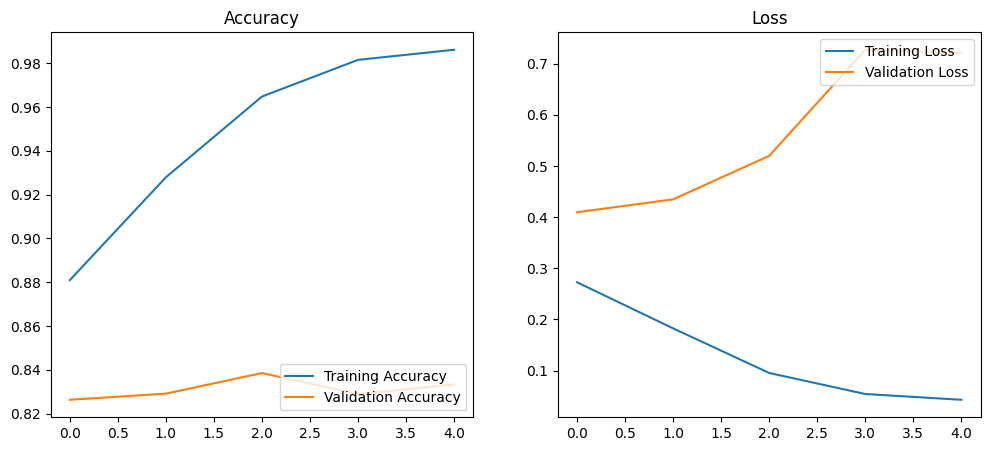

In [5]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

# Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Loss')

plt.show()


1/1 [==============================] - 1s 829ms/step


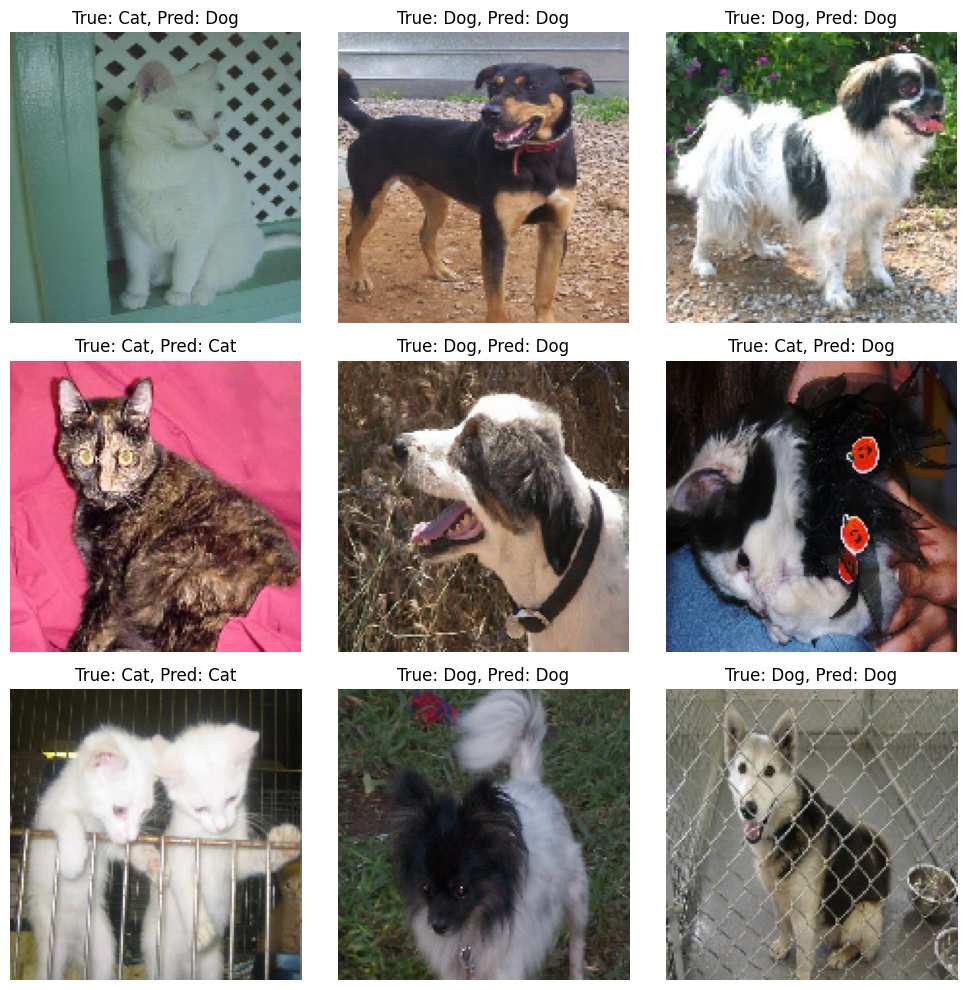

In [6]:

class_names = list(val_data.class_indices.keys())
val_data.reset()
images, labels = next(val_data)

preds = model.predict(images) > 0.5
labels = labels.astype(bool)

plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title(f"True: {class_names[int(labels[i])]}, Pred: {class_names[int(preds[i])]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
